Using device: cpu


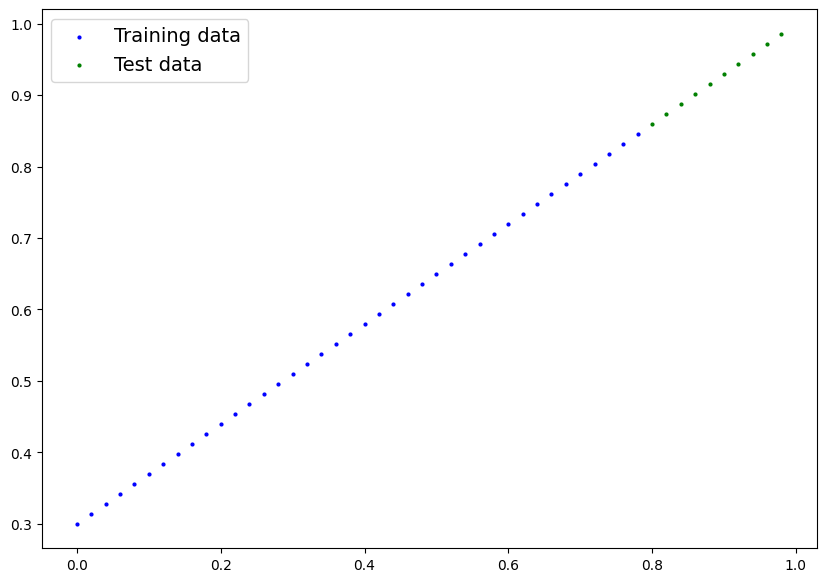

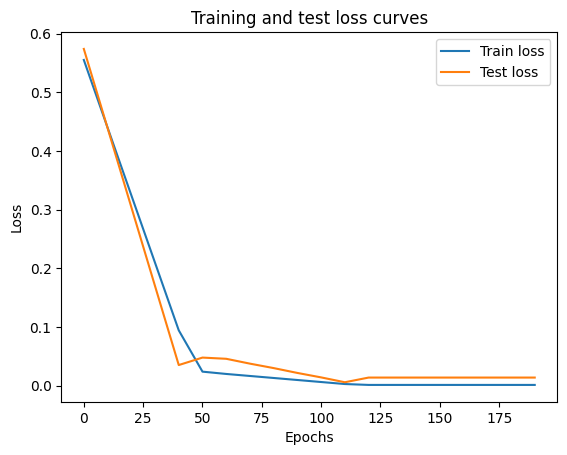

<Figure size 640x480 with 0 Axes>

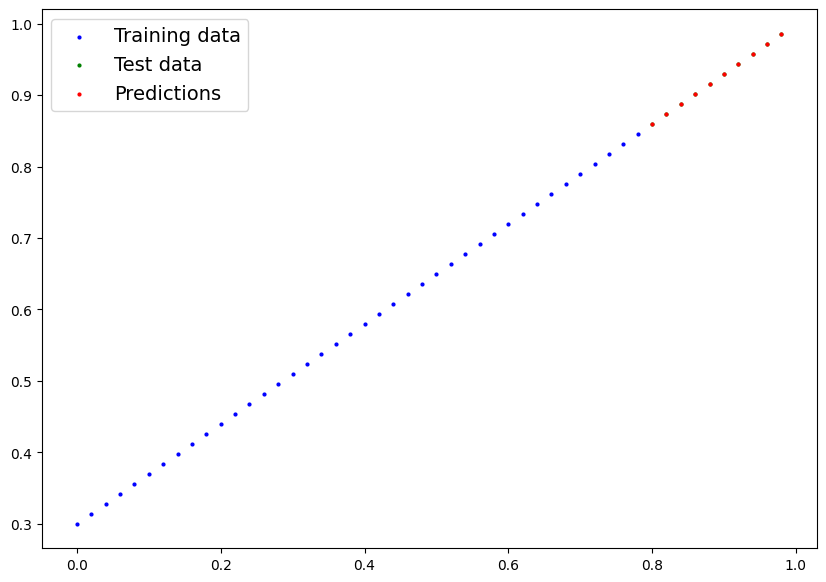

In [ ]:
#Machine learning: Linear Regression Exercise
# Author: Mohammad Jobayer Hossain

import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

#Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')

#torch.__version__
#!nvidia-smi

#create some data using linear regression, y-wight*X+bias
weight=0.7
bias=0.3
start=0
end=1
step=0.02
X=torch.arange(start, end, step).unsqueeze(dim=1)
y=weight*X + bias

#split the data
train_split=int(0.8 * len(X))
X_train=X[:train_split]
y_train=y[:train_split]
X_test=X[train_split:]
y_test=y[train_split:]
#len(X_train), len(y_train)

def plot_prediction(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')
  plt.scatter(test_data, test_labels, c='g', s=4, label='Test data')
  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')
  plt.legend(prop={'size':14})

#plot the data
plot_prediction(X_train, y_train, X_test, y_test)

#Building a PyTorch Linear Model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    #Use nn.Linear() for creating the model parameters
    self.linear_layer=nn.Linear(in_features=1, out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)


#set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()


#Set the model to use GPU
model_1.to(device)
next(model_1.parameters()).device #Check current device


#Training: Loss function, Optimizer, Training Loop, Testing Loop
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_1.parameters(), lr=0.01)
torch.manual_seed(42)
epochs=200
epoch_count=[]
train_loss_values=[]
test_loss_values=[]

#Device agnostic code for data
X_train=X_train.to(device)
y_train=y_train.to(device)
X_test=X_test.to(device)
y_test=y_test.to(device)

for epoch in range (epochs):
  model_1.train()
  y_pred=model_1(X_train)         #forward pass
  loss= loss_fn(y_pred, y_train)  #calculate the loss
  optimizer.zero_grad()           #optimizer zero grad
  loss.backward()                 #backpropagation
  optimizer.step()                #optimizer step

  model_1.eval()
  with torch.inference_mode():
    test_pred=model_1(X_test)
    test_loss=loss_fn(test_pred, y_test)

  if epoch % 10 ==0:
    epoch_count.append(epoch)
    train_loss_values.append(loss)
    test_loss_values.append(test_loss)
    #print(f'Epoch: {epoch} | Train Loss: {loss} | Test loss: {test_loss}')
    #print(model_1.state_dict())


#Plot loss
plt.figure(2)
plt.plot(epoch_count, torch.tensor(train_loss_values).cpu().numpy(), label='Train loss')
plt.plot(epoch_count, torch.tensor(test_loss_values), label='Test loss')
plt.legend()
plt.title('Training and test loss curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')

#Predict with the final model (final epoch)
with torch.inference_mode():
  y_preds = model_1(X_test)
plt.figure(3)
plot_prediction(predictions=y_preds.cpu())



In [ ]:
#Saving and loading the model
#create model saving path
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME='01_pytorch_workflow_model_1.pth'
MODEL_SAVE_PATH=MODEL_PATH / MODEL_NAME
print(f'Saving model to: {MODEL_SAVE_PATH}')

#Saving the model
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

#Load a model
loaded_model=LinearRegressionModelV2() #type of the model
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model.to(device)
loaded_model.state_dict()

#loaded_model.state_dict()
#next(loaded_model.parameters()).device

#Evaluate loaded model
loaded_model.eval()
with torch.inference_mode():
  loaded_model_preds=loaded_model(X_test)
#y_preds==loaded_model_preds

Saving model to: models/01_pytorch_workflow_model_1.pth
